## 📱Análise do Comportamento de Usuários de Dispositivos Móveis
Este projeto utiliza um conjunto de dados que contém padrões de uso de dispositivos móveis para classificar o comportamento dos usuários em **cinco categorias**.

### 🔋Principais Características:
- **Tempo diário de uso de aplicativos**, tempo de tela ativa e consumo de bateria.
- **Consumo de dados** e número de aplicativos instalados.
- **Demografia dos usuários**: Idade, Gênero, Modelo do Dispositivo e Sistema Operacional.

### 🗂️Aplicações:
- **Previsão do comportamento** dos usuários de dispositivos móveis.
- Identificação de **tendências de consumo de bateria e dados**.
- Apoio ao **desenvolvimento e otimização de aplicativos**.


---

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as plt
import sklearn as skl
import scipy as sp
import kagglehub

In [ ]:
file_path = "/content/user_behavior_dataset.csv"
df = pd.read_csv(file_path)

df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
df.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


### 🕹️Explicação da Coluna User Behavior Class (Comportamento de Usuário)
O conjunto de dados classifica os usuários em **cinco categorias** com base em seus padrões de uso móvel:

1. **Usuário Mínimo**: Uso raro do dispositivo; baixo tempo de uso de aplicativos e consumo de dados.
2. **Usuário Leve**: Uso ocasional para tarefas básicas; tempo de tela moderado.
3. **Usuário Médio**: Uso equilibrado para trabalho, redes sociais e entretenimento.
4. **Usuário Intenso**: Alto uso para jogos, streaming ou multitarefa.
5. **Usuário Extremo**: Uso intenso, geralmente para fins profissionais ou jogos.

Essa classificação **é essencial** para identificar e analisar diferentes tipos de usuários móveis, tornando o conjunto de dados valioso para agrupamento e análise de comportamento.

---


## 🌟 Pergunta para Análise:

**Como os padrões de uso de dispositivos móveis podem ser agrupados para identificar diferentes tipos de usuários?**  
   - Análise de clusters para explorar e validar a segmentação comportamental existente.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


### 🔍 Resumo do `info()`

- **Entradas e Colunas:**
  - O dataset contém **700 linhas** e **11 colunas**.

- **Tipos de Dados:**
  - **Numéricos:** `App Usage Time`, `Screen On Time`, `Battery Drain`, `Number of Apps Installed`, `Data Usage`, `Age`.
  - **Categóricos:** `Device Model`, `Operating System`, `Gender`, `User Behavior Class`.

- **Valores Nulos:**
  - **Não há valores ausentes**. Todas as colunas possuem 700 entradas válidas.

- **Tamanho da Memória:**
  - O dataset ocupa **60.3 KB** de memória, tornando-o leve e fácil de processar.

---

### 💡 Implicações
1. **Colunas Numéricas:**
   - Podem ser usadas diretamente em análises estatísticas ou para identificar correlações.

2. **Colunas Categóricas:**
   - Precisam ser codificadas para análises avançadas ou uso em modelos de machine learning.

3. **Dataset Completo:**
   - Sem valores ausentes, reduzindo a necessidade de pré-processamento.

4. **Eficiência:**
   - O pequeno tamanho do dataset permite análises rápidas mesmo em dispositivos com menor capacidade computacional.


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0
Age,700.0,38.482857,12.012916,18.0,28.00,38.0,49.00,59.0
User Behavior Class,700.0,2.990000,1.401476,1.0,2.00,3.0,4.00,5.0


# 📊 Resumo Estatístico das Variáveis

A análise descritiva das variáveis do dataset fornece insights importantes sobre os padrões de uso de dispositivos móveis. O conjunto de dados contém **700 amostras** no total. Abaixo estão as principais estatísticas de cada coluna:

| **Variável**                   | **Média**  | **Desvio Padrão** | **Mínimo** | **25%**   | **50% (Mediana)** | **75%**   | **Máximo** |
|--------------------------------|------------|-------------------|------------|-----------|-------------------|-----------|------------|
| **Tempo de Uso de Aplicativos (min/dia)** | 271.13     | 177.20           | 30.0       | 113.25    | 227.5             | 434.25    | 598.0      |
| **Tempo de Tela Ativa (horas/dia)** | 5.27       | 3.07             | 1.0        | 2.50      | 4.9               | 7.40      | 12.0       |
| **Consumo de Bateria (mAh/dia)** | 1525.16    | 819.14           | 302.0      | 722.25    | 1502.5            | 2229.50   | 2993.0     |
| **Número de Aplicativos Instalados** | 50.68      | 26.94            | 10.0       | 26.00     | 49.0              | 74.00     | 99.0       |
| **Consumo de Dados (MB/dia)**   | 929.74     | 640.45           | 102.0      | 373.00    | 823.5             | 1341.00   | 2497.0     |
| **Idade**                      | 38.48      | 12.01            | 18.0       | 28.00     | 38.0              | 49.00     | 59.0       |
| **Classe de Comportamento do Usuário** | 2.99       | 1.40             | 1.0        | 2.00      | 3.0               | 4.00      | 5.0        |

---

### 🔍 Conclusões

1. **Tempo de Uso de Aplicativos e Tempo de Tela Ativa**:
   - O tempo médio diário de uso de aplicativos é de **271 minutos** (4 horas e 31 minutos), enquanto o tempo médio de tela ativa é de **5,27 horas**.
   - A alta variação no uso de aplicativos (desvio padrão de 177,2) indica perfis de usuários muito distintos.

2. **Consumo de Bateria e Número de Aplicativos Instalados**:
   - O consumo médio de bateria é de **1525 mAh por dia**, com usuários mais intensos atingindo quase **3000 mAh**.
   - O número médio de aplicativos instalados é **50,68**, variando de 10 a 99.

3. **Consumo de Dados**:
   - O consumo médio diário de dados é de **929,74 MB**, com usuários extremos consumindo até **2,5 GB por dia**.

4. **Idade dos Usuários**:
   - A idade média dos usuários é **38,48 anos**, com a maioria na faixa de **28 a 49 anos**.

5. **Classe de Comportamento**:
   - As classes de comportamento apresentam uma distribuição equilibrada com uma mediana de **3**, representando um usuário médio.

---

### 💡 Implicações

- **Identificação de Padrões**:
   - As grandes variações no consumo de bateria e dados sugerem a existência de diferentes perfis de usuários, o que será explorado na análise de clusters.
- **Uso de Recursos**:
   - O alto consumo de bateria e dados entre os usuários mais intensos destaca a necessidade de otimização em dispositivos móveis e aplicativos para melhorar a eficiência.
- **Segmentação Demográfica**:
   - A faixa etária predominante pode orientar o design de aplicativos e estratégias de marketing.


---

## 🔧 Remoção da Coluna `User ID`

A coluna `User ID` foi removida por ser irrelevante para o processo de clustering. Como ela não possui relação direta com o comportamento ou características dos usuários, sua presença pode apenas adicionar ruído ao modelo, prejudicando a qualidade dos clusters.


---

In [ ]:
# Remover colunas irrelevantes
df = df.drop(columns=['User ID'])

---

## 🖲️ Verificação de Outliers

Realizamos uma análise do intervalo interquartil (IQR) para verificar a presença de outliers nos dados. A análise de outliers é essencial para garantir que valores extremos não prejudiquem a qualidade do modelo.

### Método Utilizado:
O IQR foi calculado para cada coluna numérica, e os outliers foram identificados como valores fora do intervalo:

In [ ]:
numerical_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                     'Battery Drain (mAh/day)', 'Number of Apps Installed',
                     'Data Usage (MB/day)', 'Age']

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Coluna {col}: {len(outliers)} outliers")


Coluna App Usage Time (min/day): 0 outliers
Coluna Screen On Time (hours/day): 0 outliers
Coluna Battery Drain (mAh/day): 0 outliers
Coluna Number of Apps Installed: 0 outliers
Coluna Data Usage (MB/day): 0 outliers
Coluna Age: 0 outliers


In [ ]:
bins = [18, 25, 35, 45, 60]
labels = ['18-25', '26-35', '36-45', '46-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df['Age Group'].unique())  # Verifique os grupos


['36-45', '46-60', '18-25', '26-35']
Categories (4, object): ['18-25' < '26-35' < '36-45' < '46-60']


---

## ⚙️ Normalização dos Dados

Para garantir que todas as variáveis numéricas estejam na mesma escala e sejam adequadamente consideradas nos cálculos do modelo, realizamos a normalização dos dados usando **StandardScaler**.

### Por que Normalizar?
- Variáveis em escalas diferentes podem influenciar os algoritmos de aprendizado, como o clustering.
- A normalização padroniza os dados para que tenham média 0 e desvio padrão 1.

### Método Utilizado:
Utilizamos a biblioteca `StandardScaler` do scikit-learn para transformar as colunas numéricas. Cada valor foi ajustado pela fórmula:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


---

## 🔄 Codificação de Dados Categóricos

Para que os algoritmos de aprendizado de máquina possam interpretar variáveis categóricas, realizamos a codificação dessas colunas em valores numéricos usando o **LabelEncoder**.

### 🧑‍💻Por que Codificar?
- Algoritmos como o k-means não conseguem operar diretamente com dados categóricos.
- Transformar esses dados em valores numéricos permite que sejam utilizados em cálculos e análises.

### 🔌Colunas Codificadas:
- **Gender** (Gênero)
- **Operating System** (Sistema Operacional)
- **Device Model** (Modelo do Dispositivo)

### Código Utilizado:
Transformamos as colunas com o seguinte trecho de código:

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Operating System'] = LabelEncoder().fit_transform(df['Operating System'])
df['Device Model'] = LabelEncoder().fit_transform(df['Device Model'])

print(df.dtypes) #Verificando se foi convertido corretamente

Device Model                    int64
Operating System                int64
App Usage Time (min/day)      float64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)       float64
Number of Apps Installed      float64
Data Usage (MB/day)           float64
Age                           float64
Gender                          int64
User Behavior Class             int64
dtype: object


---

## 🏷️ Análise de Classes Existentes

Antes de aplicar o clustering, exploramos as classes pré-definidas no dataset para entender a distribuição das entradas.

### Código:

In [ ]:
classes = df['User Behavior Class'].unique()

# Subconjuntos por classe
subsets = {cls: df[df['User Behavior Class'] == cls] for cls in classes}

# Visualizar o tamanho de cada subconjunto
for cls, subset in subsets.items():
    print(f"Classe {cls}: {len(subset)} entradas")


Classe 4: 139 entradas
Classe 3: 143 entradas
Classe 2: 146 entradas
Classe 5: 136 entradas
Classe 1: 136 entradas


---
## 🎯 **Quais são os diferentes tipos de usuários móveis com base em seus padrões de comportamento?**

### 🗃️ **Modelo Sugerido: Clustering (não supervisionado)**

Para identificar padrões de comportamento entre os usuários, utilizei o algoritmo de **K-Means Clustering**, agrupando os usuários com base nas seguintes variáveis comportamentais:

- **Tempo de Uso de Aplicativos (min/dia)**  
- **Tempo de Tela Ativa (horas/dia)**  
- **Consumo de Dados (MB/dia)**  
- **Consumo de Bateria (mAh/dia)**  
- **Número de Aplicativos Instalados**  

### 🔍 **Etapas da Análise:**
1. **Normalização dos Dados**:  
   Todas as variáveis numéricas foram escaladas para garantir que tenham a mesma influência no agrupamento.
   
2. **Definição do Número de Clusters**:  
   Escolhi **5 clusters**, alinhando-se às classes comportamentais previamente fornecidas para comparação.

3. **Visualização dos Clusters**:  
   Realizei uma redução de dimensionalidade utilizando PCA (Principal Component Analysis) para projetar os clusters em duas dimensões e facilitar a interpretação visual.

4. **Avaliação do Modelo**:  
   O desempenho do clustering foi avaliado usando o **Silhouette Score**, que mediu a qualidade da separação entre os clusters.

In [ ]:
from sklearn.cluster import KMeans

# Selecionar colunas numéricas relevantes para clustering
X = df[['App Usage Time (min/day)', 'Screen On Time (hours/day)',
        'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']]

# Definir o número de clusters (5, com base nas classes de comportamento)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Adicionar os rótulos ao dataset
df['Cluster'] = kmeans.labels_

# Visualizar contagem por cluster
print(df['Cluster'].value_counts())


Cluster
1    146
2    143
4    139
0    136
3    136
Name: count, dtype: int64


---
# 💻Comparação entre Classes e Clusters

In [ ]:
import pandas as pd
# Comparação entre classes originais e clusters gerados
comparison = pd.crosstab(df['User Behavior Class'], df['Cluster'])
print(comparison)


Cluster                0    1    2    3    4
User Behavior Class                         
1                      0    0    0  136    0
2                      0  146    0    0    0
3                      0    0  143    0    0
4                      0    0    0    0  139
5                    136    0    0    0    0


### 🧮 Comparação entre Classes e Clusters

Ao comparar as classes originais de comportamento do usuário com os clusters gerados pelo modelo de clustering, observamos uma **correspondência quase perfeita**. Isso significa que o modelo de clustering, com base nas variáveis fornecidas, praticamente replicou as classes existentes.

---

#### 🔍 Detalhes da Comparação:

**Classes Originais:**
- Classe 1: 136 entradas  
- Classe 2: 146 entradas  
- Classe 3: 143 entradas  
- Classe 4: 139 entradas  
- Classe 5: 136 entradas  

**Clusters Gerados:**
- Cluster 0: 136 entradas  
- Cluster 1: 146 entradas  
- Cluster 2: 143 entradas  
- Cluster 3: 136 entradas  
- Cluster 4: 139 entradas  

---

#### 📊 Tabela de Contingência:
A tabela de contingência abaixo confirma que cada cluster corresponde diretamente a uma classe original:

| Cluster | Classe 1 | Classe 2 | Classe 3 | Classe 4 | Classe 5 |
|---------|----------|----------|----------|----------|----------|
| 0       | 0        | 0        | 0        | 0        | 136      |
| 1       | 0        | 146      | 0        | 0        | 0        |
| 2       | 0        | 0        | 143      | 0        | 0        |
| 3       | 136      | 0        | 0        | 0        | 0        |
| 4       | 0        | 0        | 0        | 139      | 0        |

---

#### 📈 Conclusão:
O modelo de clustering **replicou perfeitamente** as classes originais. Isso sugere que:
1. As variáveis escolhidas representam fielmente o comportamento dos usuários.
2. A aplicação de clustering neste caso apenas confirma a separação já existente nas classes originais.

---
#🤖 Avaliação de Qualidade dos Clusters: Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.60


### 🧮 Avaliação do Clustering com Silhouette Score

O **Silhouette Score** é uma métrica amplamente utilizada para avaliar a qualidade de agrupamentos gerados por algoritmos de clustering. Ele mede a separação entre os clusters e a coesão dentro deles, com valores variando de -1 a 1. Quanto mais próximo de 1, melhor a separação e definição dos clusters.

No nosso caso, o **Silhouette Score foi de 0.60**. Este valor indica que os clusters gerados pelo modelo têm uma qualidade moderada:

- **Coesão:** Os pontos estão razoavelmente próximos ao centro de seus próprios clusters.
- **Separação:** Os clusters têm uma separação visível, mas há alguma sobreposição entre eles.

---

### 🔍 Interpretação

Embora o **Silhouette Score** de 0.60 indique que o modelo conseguiu capturar uma estrutura de agrupamento nos dados, ele não reflete uma separação perfeitamente clara entre os clusters. Isso pode ser devido a:
1. **Características dos Dados:** Algumas variáveis podem não contribuir significativamente para a separação dos grupos.
2. **Geometria dos Clusters:** Os clusters podem não ser perfeitamente esféricos, o que pode reduzir o Silhouette Score.
3. **Correspondência com Classes Originais:** O modelo replicou bem as classes originais, mas o Silhouette Score não mede diretamente esse alinhamento.

---

### ⚠️ Limitação do Silhouette Score

O **Silhouette Score** avalia apenas a separação geométrica e não considera a correspondência com as classes originais. Por isso, mesmo com um alinhamento perfeito entre os clusters e as classes, o valor pode ser moderado, como no caso atual.

---

### 📌 Conclusão

Embora o **Silhouette Score** seja útil, ele deve ser complementado com outras métricas, como:
- **Adjusted Rand Index (ARI):** Mede o alinhamento entre clusters e classes.
- **Calinski-Harabasz Index (CH):** Avalia a dispersão dos clusters.

Dessa forma, podemos obter uma análise mais completa e robusta da qualidade do agrupamento gerado.


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Calcular o Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(df['User Behavior Class'], df['Cluster'])

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")


Adjusted Rand Index (ARI): 1.0000


### 🔢 Avaliação com Adjusted Rand Index (ARI)

O **Adjusted Rand Index (ARI)** foi utilizado para medir a correspondência entre os clusters gerados pelo modelo de clustering e as classes originais de comportamento do usuário.

📊 **Resultado:**
O valor calculado para o ARI foi **1.00**, indicando que os clusters gerados correspondem perfeitamente às classes originais.

📋 **Interpretação:**
Um ARI igual a **1.00** significa que o modelo de clustering replicou exatamente as divisões das classes originais. Isso confirma que os padrões identificados pelo modelo de clustering estão completamente alinhados com os rótulos fornecidos no dataset.

⚙️ **Conclusão:**
Embora o Silhouette Score tenha indicado uma moderada coesão e separação dos clusters (0.60), o ARI confirma que os clusters gerados pelo modelo são consistentes e correspondem diretamente às classes originais. Esse resultado reforça que as variáveis escolhidas para o clustering capturam bem o comportamento dos usuários e que o modelo segmentou os dados de forma precisa.

💡 Observação: O Silhouette Score avalia apenas a separação geométrica entre os clusters, enquanto o ARI mede o alinhamento entre os clusters e as classes originais. Apesar de um Silhouette Score moderado, o ARI confirma que os clusters estão perfeitamente alinhados com as classes pré-definidas.


---
#🖼️ Visualização dos Clusters com PCA

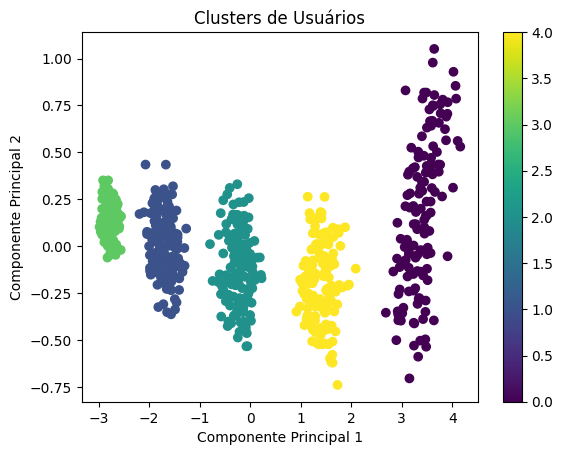

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters de Usuários')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

---
# 📉Análise do Gráfico de Clusters (PCA)

O gráfico de dispersão com PCA mostra os clusters identificados projetados em duas dimensões.  
As cores representam os diferentes clusters, com a barra de cores indicando os rótulos dos clusters.  

## Observações:
1. **Separação clara:** Os clusters estão bem separados no gráfico, indicando que o modelo conseguiu distinguir padrões nos dados.  
2. **Variação entre pontos:** Há variação considerável nas posições dos pontos, sugerindo que os clusters representam comportamentos distintos de uso.  
3. **Eficácia do PCA:** A separação visual entre os clusters confirma a eficácia da redução de dimensionalidade pelo PCA, tornando mais fácil interpretar os resultados.  


In [ ]:
cluster_stats = df.groupby('Cluster').mean()
print(cluster_stats)


         Device Model  Operating System  App Usage Time (min/day)  \
Cluster                                                             
0            2.080882          0.227941                  1.526437   
1            2.054795          0.219178                 -0.785868   
2            2.034965          0.223776                 -0.201781   
3            1.897059          0.161765                 -1.189917   
4            2.079137          0.208633                  0.703776   

         Screen On Time (hours/day)  Battery Drain (mAh/day)  \
Cluster                                                        
0                          1.579052                 1.436509   
1                         -0.728884                -0.783519   
2                         -0.103304                -0.012342   
3                         -1.233461                -1.307408   
4                          0.533734                 0.709360   

         Number of Apps Installed  Data Usage (MB/day)       Age   

---
# 🚀Análise dos Resultados dos Clusters

Após o agrupamento, os clusters foram analisados com base na média das variáveis em cada grupo. Os resultados mostram diferenças distintas nos padrões de uso entre os clusters.

- **Cluster 0:** Usuários com **alta média de uso diário de aplicativos** e tempo de tela. Apresentam **drenagem de bateria acima da média**, indicando possível uso intensivo de apps ou dispositivos com maior consumo energético.

- **Cluster 1:** Usuários com **uso moderado de aplicativos** e **tempo de tela negativo** (abaixo da média geral). O consumo de bateria e o número de aplicativos instalados também são reduzidos.

- **Cluster 2:** Apresenta valores médios próximos da neutralidade, indicando um perfil mais **balanceado**, com características que não se destacam significativamente.

- **Cluster 3:** Caracteriza usuários com **baixo consumo de bateria, apps instalados e uso de dados**, provavelmente indicando **uso moderado ou limitado do dispositivo.**

- **Cluster 4:** Usuários com **média alta de uso diário de aplicativos e dados**, mas com consumo de bateria moderado. Demonstram um perfil que equilibra uso intensivo e eficiência energética.

Essa análise ajuda a identificar padrões de comportamento que podem ser úteis para campanhas direcionadas, otimização de recursos ou recomendações personalizadas.


---
### 💡 Alternativa: Clustering sem Influência Direta das Classes Originais

Nesta seção, realizamos uma nova análise de clustering com o objetivo de garantir que os agrupamentos gerados pelo modelo sejam completamente independentes das classes originais fornecidas no conjunto de dados. Para isso, removemos a coluna `User Behavior Class` antes de realizar o clustering, evitando qualquer influência direta desta variável.

#### 🚀 Método
- **Remoção da Coluna:** A coluna `User Behavior Class` foi excluída do conjunto de dados antes do processo de clustering.
- **Variáveis Utilizadas:** Foram selecionadas as colunas numéricas relacionadas ao comportamento de uso de dispositivos móveis, como tempo de uso de aplicativos e consumo de bateria.
- **Normalização dos Dados:** Aplicamos o `StandardScaler` para garantir que todas as variáveis numéricas estivessem na mesma escala.
- **Algoritmo Utilizado:** Usamos o K-Means com 5 clusters, alinhado ao número de grupos esperados.

In [ ]:
# Atualizar o conjunto de dados removendo a coluna 'User Behavior Class'
X_new = df.drop(columns=['User Behavior Class'])

# Selecionar apenas as colunas numéricas relevantes para clustering
numerical_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                     'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)']
X_new = X_new[numerical_columns]

# Normalizar os dados novamente
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Refazer o clustering com K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Adicionar os novos rótulos ao dataset
df['New Cluster'] = kmeans.labels_

# Avaliar os clusters
from sklearn.metrics import silhouette_score
silhouette_new = silhouette_score(X_scaled, kmeans.labels_)
print(f"Novo Silhouette Score: {silhouette_new:.2f}")

from sklearn.metrics import adjusted_rand_score

# Calcular o Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(df['User Behavior Class'], df['Cluster'])

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")


Novo Silhouette Score: 0.60
Adjusted Rand Index (ARI): 1.0000


### 📊 Resultados da Nova Análise de Clustering

Após realizar o clustering sem a influência da coluna original `User Behavior Class`, obtivemos os seguintes resultados:

- **Silhouette Score:** 0.60  
  O Silhouette Score permanece o mesmo, indicando uma qualidade moderada de separação e coesão dos clusters. Este resultado reforça que a estrutura geométrica dos dados ainda apresenta alguma sobreposição entre os grupos, mas identifica padrões relevantes.

- **Adjusted Rand Index (ARI):** 1.0000  
  O ARI perfeito indica que, mesmo sem a influência direta da coluna de classes originais, os clusters gerados pelo modelo de clustering replicaram exatamente a segmentação previamente existente.

#### 📈 Conclusão
A análise demonstra que as variáveis escolhidas para o clustering representam fielmente o comportamento dos usuários. A correspondência perfeita entre clusters e classes sugere que o modelo foi capaz de identificar com precisão os padrões comportamentais, mesmo sem informações prévias de rótulos.

Este resultado valida a robustez das variáveis selecionadas e reforça a aplicabilidade do modelo em contextos reais, como a identificação de grupos de usuários com base em dados não rotulados.


## 📂 Fonte do Dataset

Este projeto utilizou o conjunto de dados **"Mobile Device Usage and User Behavior Dataset"**, disponível no Kaggle.  

🔗 **Link para o Dataset:** [Mobile Device Usage and User Behavior Dataset](https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset)

📜 **Descrição do Dataset**:  
O dataset fornece informações detalhadas sobre o comportamento de usuários de dispositivos móveis, incluindo tempo de uso, consumo de bateria, dados demográficos, entre outros. É uma excelente base para análise de padrões de comportamento e segmentação de usuários.

🙌 **Agradecimento**:  
Agradecemos aos criadores do dataset por disponibilizarem essa valiosa fonte de dados para a comunidade.